## HONGYE ZHOU z5471284

In [3]:
import numpy as np
import gym
import matplotlib.pyplot as plt

##### Gold represents the taxi location, blue is the pickup location, and purple is the drop-off location

C:\Users\learn\AppData\Roaming\Python\Python38\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


5.525252525252525
13.474747474747474


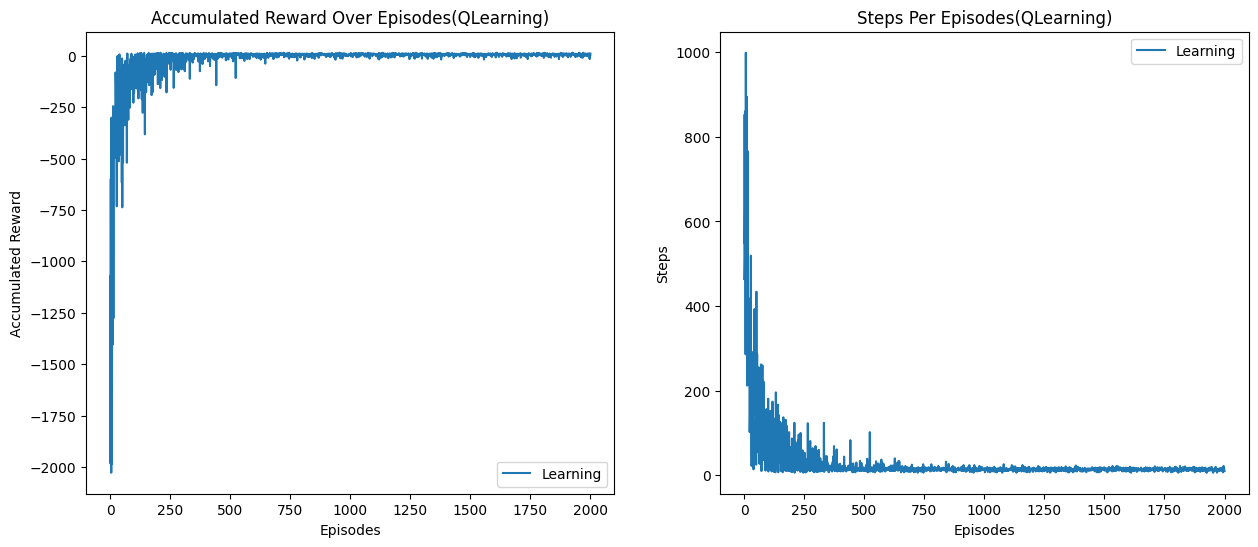

In [26]:
import gym
import numpy as np
from itertools import product

def train_q_learning(env, alpha, gamma, epsilon, episodes):
    q_table = np.zeros([env.observation_space.n, env.action_space.n])
    acc_rewards = []
    epochs_per_episode = []
    for i in range(episodes):
        state = env.reset()[0]
        epochs, acc_reward= 0, 0
        done = False
        while not done:
            epochs += 1
            if np.random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state])
            next_state, reward, done, _, _ = env.step(action)
            rendered_env = env.render()
            # print(rendered_env)
            # print("steps:", epochs)
            acc_reward += reward
            # print(f"State:{state}, Action:{action}, Reward:{reward}, Total Accmulated Reward:{acc_reward}")
            pre_values = q_table[state, action]
            next_max_value = np.max(q_table[next_state])
            next_state_action_value = (1 - alpha) * pre_values + alpha * (reward + gamma * next_max_value)
            q_table[state, action] = next_state_action_value
            state = next_state
        acc_rewards.append(acc_reward)
        epochs_per_episode.append(epochs)
    print(np.mean(acc_rewards[-100:-1]))
    print(np.mean(epochs_per_episode[-100 : -1]))
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    plt.plot(np.linspace(0, episodes, episodes), acc_rewards, label="Learning")
    plt.xlabel("Episodes")
    plt.ylabel("Accumulated Reward")
    plt.title("Accumulated Reward Over Episodes(QLearning)")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(np.linspace(0, episodes, episodes), epochs_per_episode, label="Learning")
    plt.xlabel("Episodes")
    plt.ylabel("Steps")
    plt.title("Steps Per Episodes(QLearning)")
    plt.legend()
    return q_table

np.random.seed(42)
env = gym.make('Taxi-v3', render_mode="ansi").env
q_table_q_learning = train_q_learning(env, alpha = 0.3, gamma = 0.95, epsilon = 0.05, episodes = 2000)

In [27]:
np.save("q_table_q_learning.npy", q_table_q_learning)

7.090909090909091
13.909090909090908


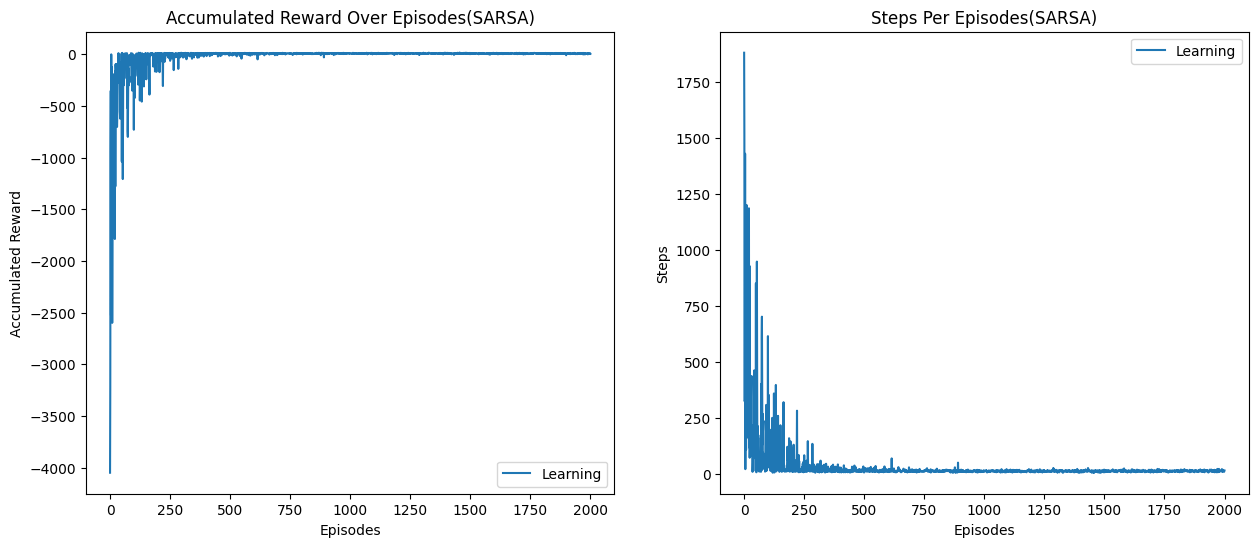

In [31]:
def softmax(x):
    x_e = np.exp(x)
    return x_e / sum(np.exp(x))

def choose_action(stata_action_table):
    p = softmax(stata_action_table)
    return np.random.choice(len(stata_action_table), p=p)

def train_sarsa(env, alpha, gamma, epsilon, episodes):
    q_table = np.zeros([env.observation_space.n, env.action_space.n])
    acc_rewards = []
    epochs_per_episode = []
    for i in range(episodes):
        state = env.reset()[0]
        # action = env.action_space.sample() if np.random.uniform(0, 1) < epsilon else np.argmax(q_table[state])
        action = choose_action(q_table[state])
        epochs, acc_reward = 0, 0
        done = False
        while not done:
            epochs += 1
            next_state, reward, done, _, _ = env.step(action)
            acc_reward += reward
            rendered_env = env.render()
            # print(rendered_env)
            # print("steps:", epochs)
            # print(f"State:{state}, Action:{action}, Reward:{reward}, Total Accmulated Reward:{acc_reward}")
            pre_value = q_table[state, action]
            # next_action = env.action_space.sample() if np.random.uniform(0, 1) < epsilon else np.argmax(q_table[next_state])
            next_action = choose_action(q_table[next_state])
            next_state_action_value = q_table[next_state, next_action]
            next_value = (1 - alpha) * pre_value + alpha * (reward + gamma * next_state_action_value)
            q_table[state, action] = next_value
            state = next_state
            action = next_action
        epochs_per_episode.append(epochs)
        acc_rewards.append(acc_reward)
    print(np.mean(acc_rewards[-100:-1]))
    print(np.mean(epochs_per_episode[-100 : -1]))
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    plt.plot(np.linspace(0, episodes, episodes), acc_rewards, label="Learning")
    plt.xlabel("Episodes")
    plt.ylabel("Accumulated Reward")
    plt.title("Accumulated Reward Over Episodes(SARSA)")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(np.linspace(0, episodes, episodes), epochs_per_episode, label="Learning")
    plt.xlabel("Episodes")
    plt.ylabel("Steps")
    plt.title("Steps Per Episodes(SARSA)")
    plt.legend()
    return q_table

np.random.seed(42)
env = gym.make('Taxi-v3', render_mode="ansi").env
q_table_sarsa = train_sarsa(env, alpha = 0.5, gamma = 0.90, epsilon = 0, episodes = 2000)

In [32]:
np.save("q_table_sarsa.npy", q_table_sarsa)

##### 我认为当epsilon越小的时候，gamma可以最大，越来越贴近Q-learning，趋于稳定

In [5]:
import numpy as np
import gym

q_table_q_learning = np.load("q_table_q_learning.npy")
q_table_sarsa = np.load("q_table_sarsa.npy")

def evaluate_policy(env, q_table, episodes=100):
    acc_epochs, acc_rewards = [], []
    for episode in range(episodes):
        acc_epoch, acc_reward = 0, 0
        state = env.reset()[0]
        done = False
        while not done:
            acc_epoch += 1
            action = np.argmax(q_table[state])
            # print(q_table[state])
            state, reward, done, _, _= env.step(action)
            acc_reward += reward
            if episode == 0:
                rendered_env = env.render()
                print(rendered_env)
                print("steps:", acc_epoch)
                print(f"State:{state}, Action:{action}, Reward:{reward}, Total Accmulated Reward:{acc_reward}")
        acc_epochs.append(acc_epoch)
        acc_rewards.append(acc_reward)
    print("-------------------------------------------------------------------------")
    print("the results are below: ")
    print(f"Average epochs per episode: {np.mean(acc_epochs)}")
    print(f"Average rewards per episode: {np.mean(acc_rewards)}")


In [8]:
env = gym.make('Taxi-v3', render_mode="ansi").env
print("Q-Learning Evaluation:")
evaluate_policy(env, q_table_q_learning)


Q-Learning Evaluation:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

steps: 1
State:173, Action:3, Reward:-1, Total Accmulated Reward:-1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

steps: 2
State:273, Action:0, Reward:-1, Total Accmulated Reward:-2
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

steps: 3
State:373, Action:0, Reward:-1, Total Accmulated Reward:-3
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

steps: 4
State:473, Action:0, Reward:-1, Total Accmulated Reward:-4
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

steps: 5
State:477, Action:4, Reward:-1, Total Accmulated Reward:-5
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (North)

steps: 6
State:377, Action:1, Reward:-1, Total Accmulated Reward:-6

In [9]:
print("SARSA Evaluation:")
evaluate_policy(env, q_table_sarsa)


SARSA Evaluation:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

steps: 1
State:351, Action:1, Reward:-1, Total Accmulated Reward:-1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

steps: 2
State:331, Action:3, Reward:-1, Total Accmulated Reward:-2
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

steps: 3
State:231, Action:1, Reward:-1, Total Accmulated Reward:-3
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

steps: 4
State:211, Action:3, Reward:-1, Total Accmulated Reward:-4
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

steps: 5
State:311, Action:0, Reward:-1, Total Accmulated Reward:-5
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

steps: 6
State:411, Action:0, Reward:-1, Total Accmulated Reward:-6
+-----